# Statistical Analysis of Massive and High Dimension Data
### Pr. Bouveyron

# Day 1

## Reminder on descriptiv statistics
Comparison between the histogram and boxplot
### Histogram

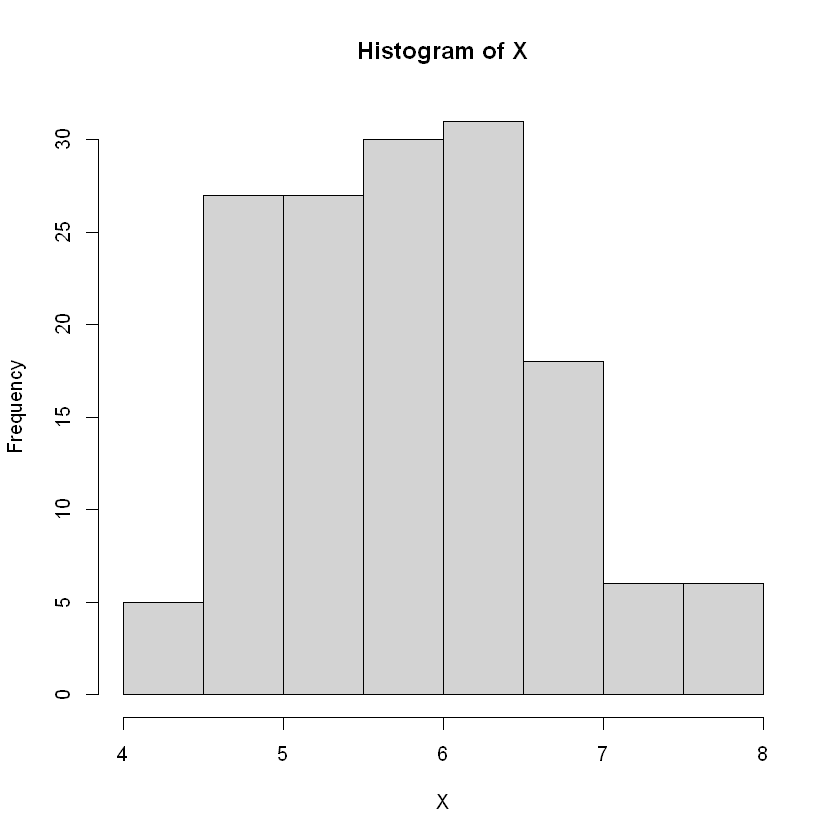

In [2]:
data(iris)
X = iris$Sepal.Length
hist(X)

It's the default version of R. Possible to change the story by tuning the histogram.

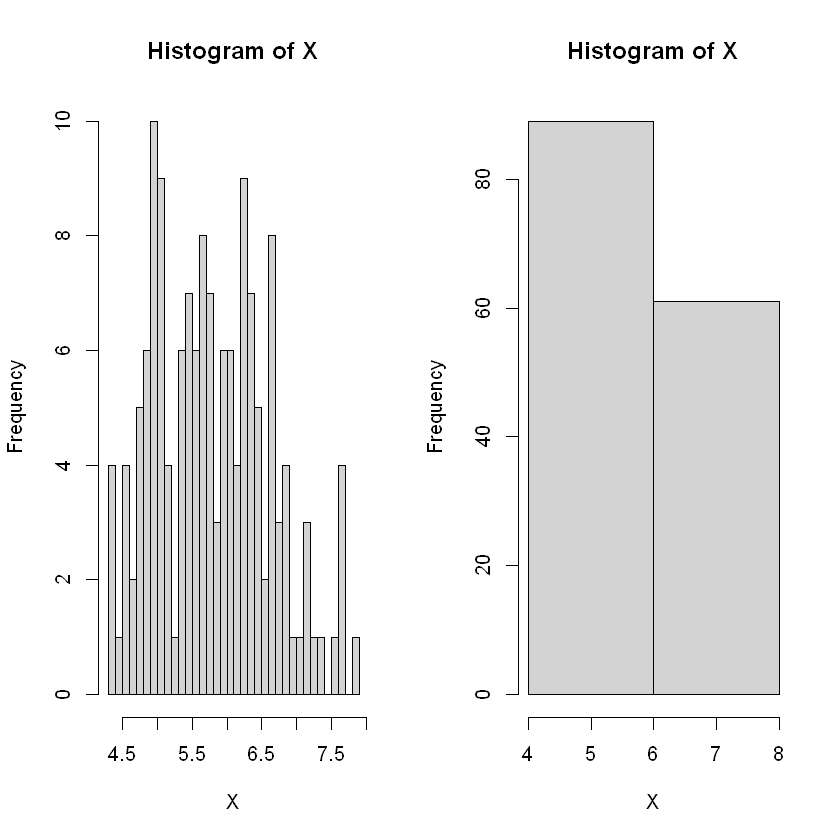

In [7]:
par(mfrow=c(1,2))
hist(X, breaks=50,freq = TRUE)
hist(X, breaks = 2)

It's possible to define specific function to calculate the best numbers of bins (by default "Strudge" function)

### Boxplot

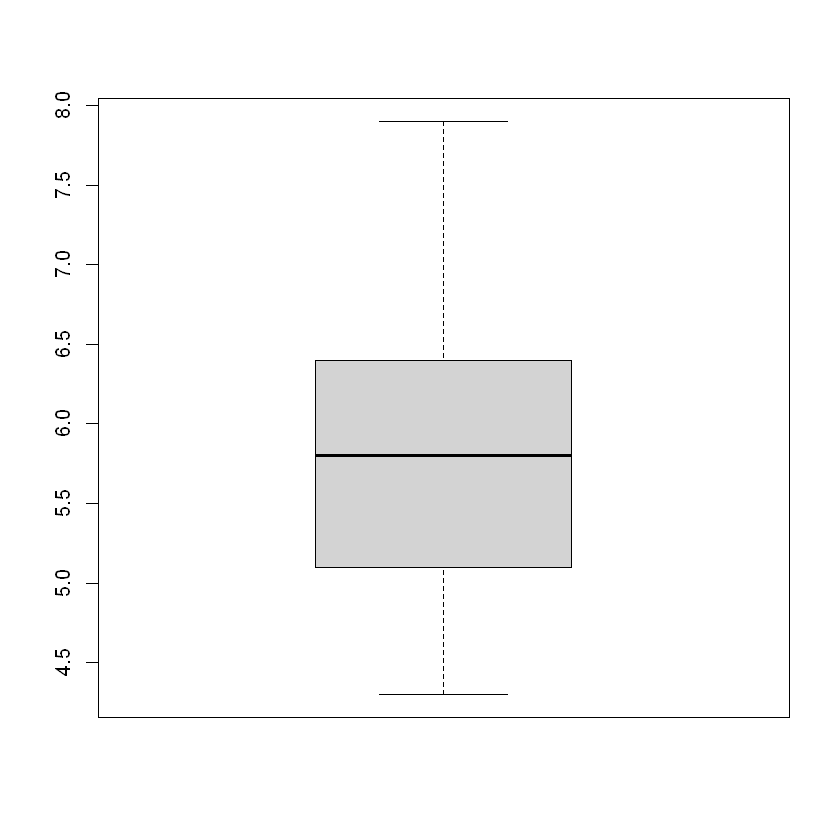

In [10]:
boxplot(X)

### Histogram + Boxplot

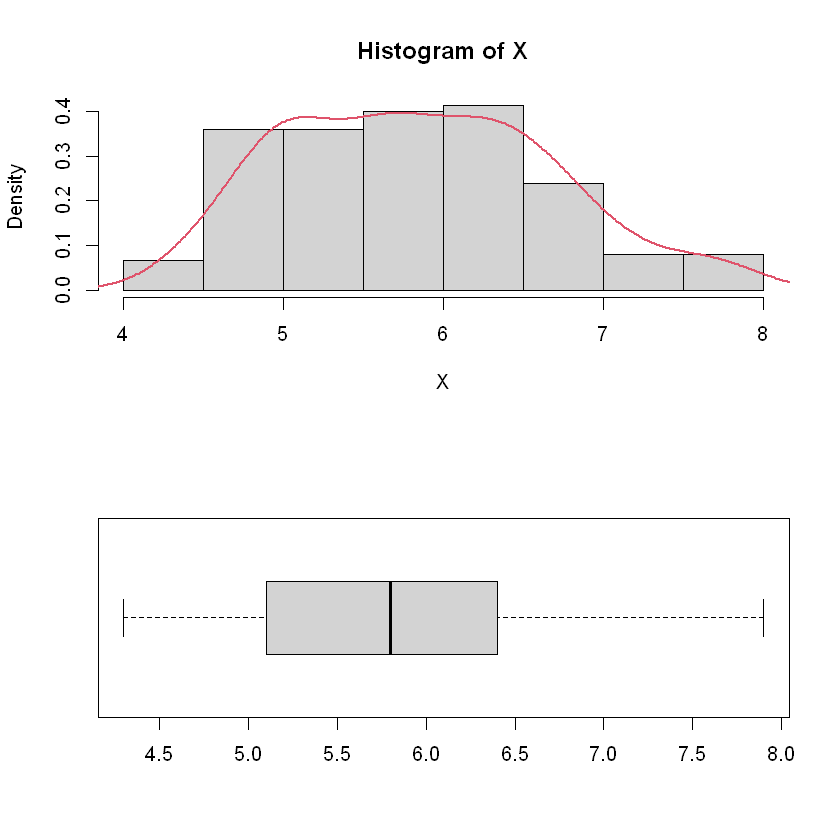

In [12]:
par(mfrow=c(2,1))
hist(X, freq=FALSE)
lines(density(X),lwd=2,col=2)
boxplot(X,horizontal = TRUE)

## Scatter and Pair plot
### Scatter plot

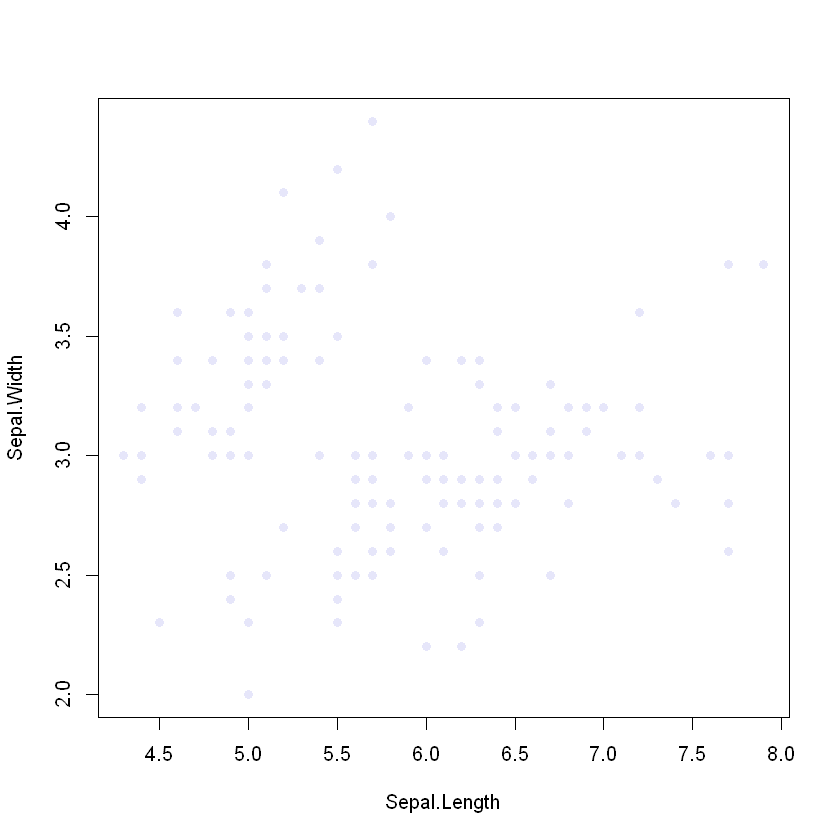

In [15]:
TwoVar = iris[,1:2]
plot(TwoVar,type='p',col='lavender',pch=19)

**Add a categorical variable on colour and pattern**

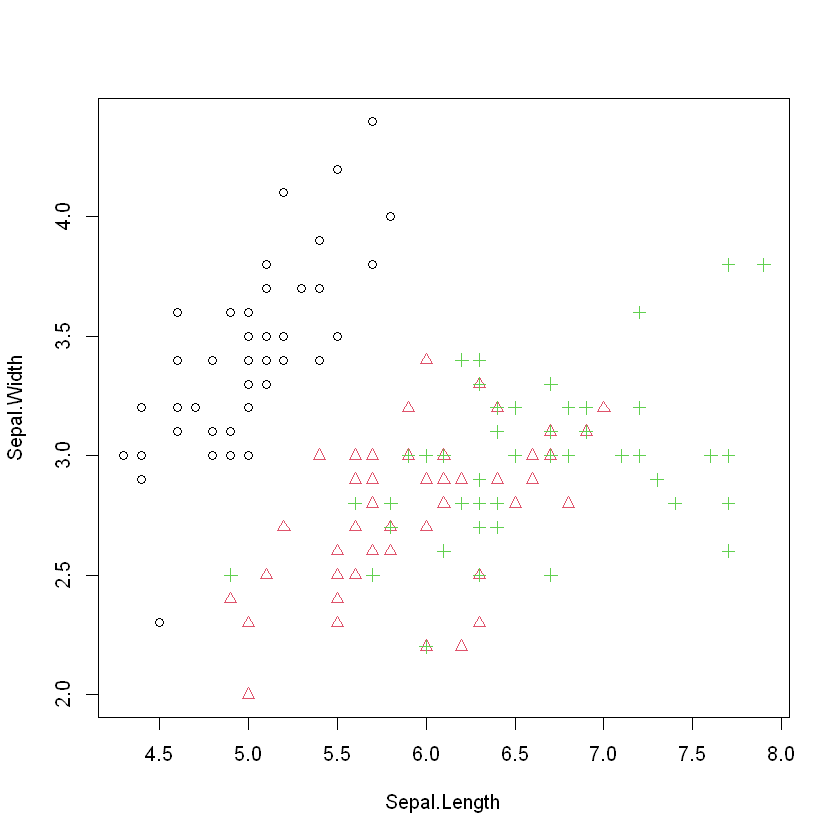

In [17]:
cls = as.numeric(iris$Species)
plot(TwoVar,type='p',col=cls,pch=cls)

**Here we can UNDERSTAND the datas**

### Multivariate data
Iris : 4 continuous variable which are all measured in centimeters => boxplot possible

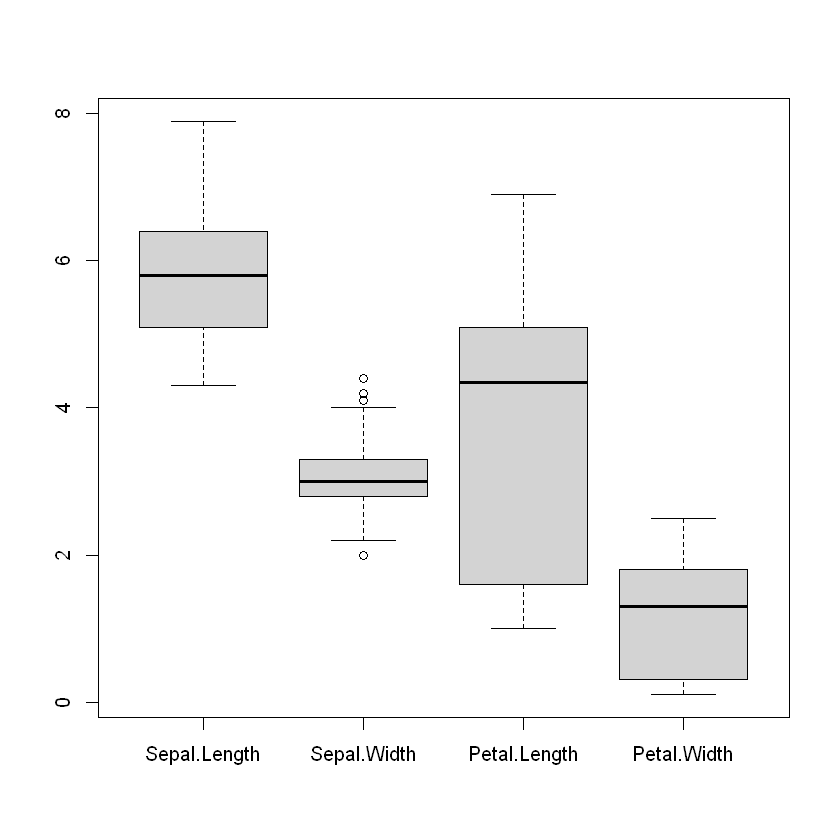

In [20]:
boxplot(iris[,-5])

More variance on length then Width

High variance on Petal.length ....

**Try to do the same with histogram ...**

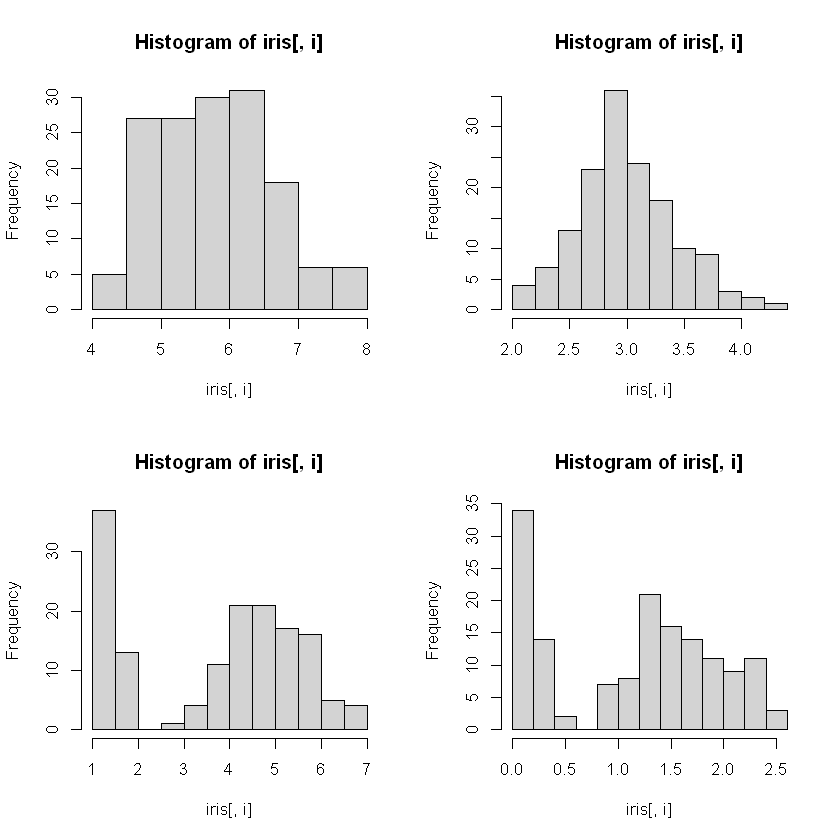

In [21]:
par(mfrow=c(2,2))
for (i in 1:4) hist(iris[,i])

** BUT difficult to read, and not the same bins, ....

### Pair plot

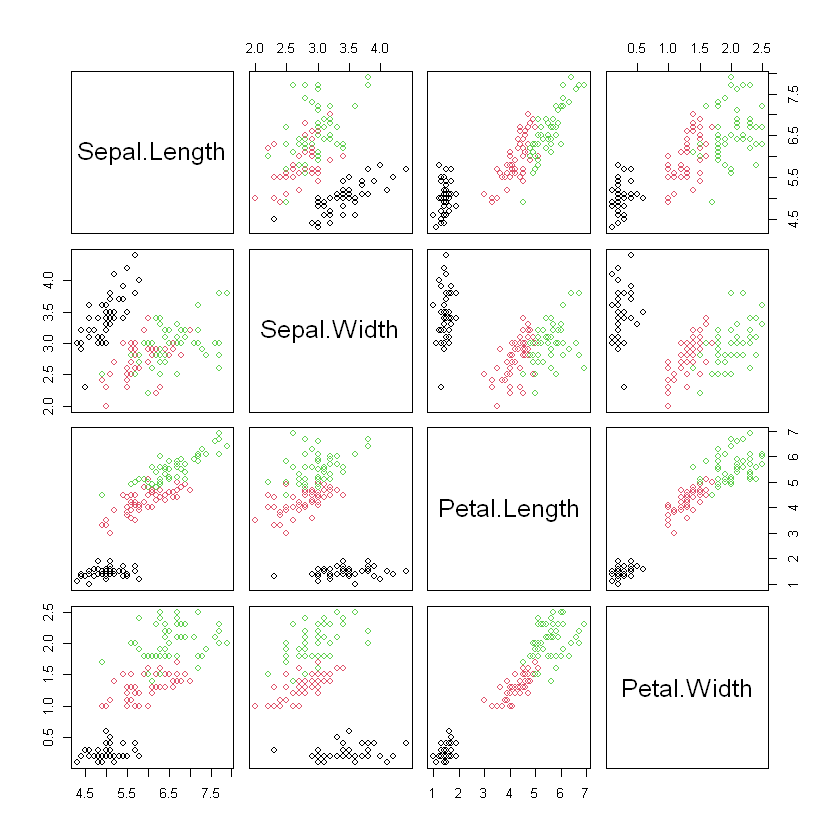

In [36]:
cls = as.numeric(iris$Species)
pairs(iris[,-5],col=cls)
#legend('top-left',legend = c("V","S","Vi"),col=1:3,pch=19)

**We can see groups, linear dependency**

### Multivariate numerical indicators

**Mean vector**
colMeans

In [32]:
colMeans(iris[,-5])

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

**covariance matrix**

In [40]:
var(iris[,-5])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


The covariance matrix can't be easely interpreted

**correlation matrix**

In [38]:
cor(iris[,-5])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


Correlation matrix is easier to interprete. Here :
* petal.width and petal.length are highly correlated
* petal.length and sepal.length also

 ## The Learning process - Importance to evaluate

### The Dataset to evaluate

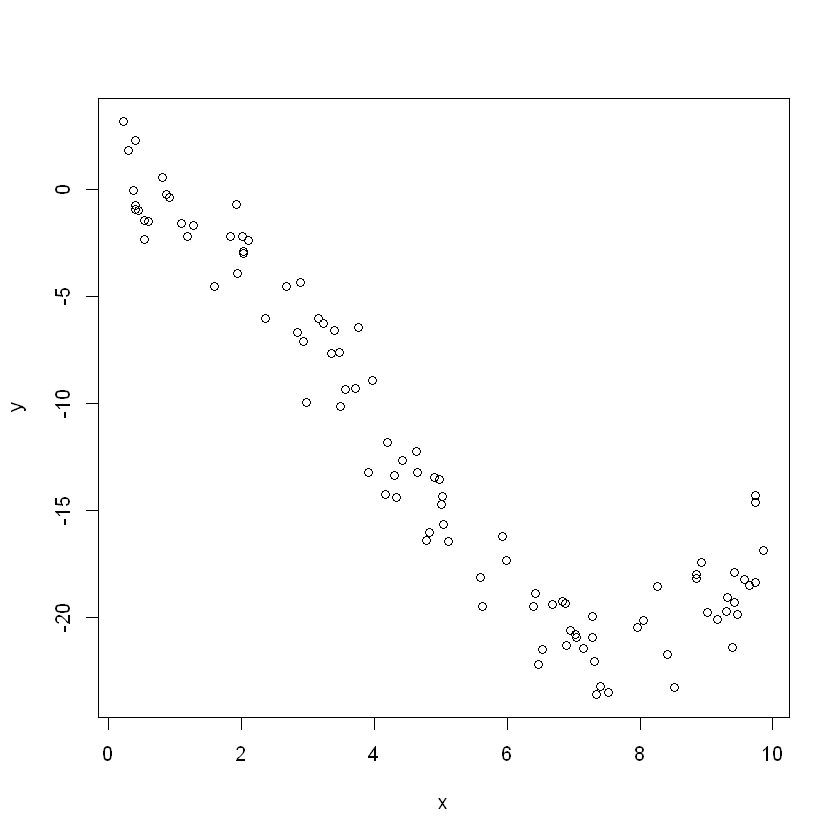

In [45]:
x = runif(100,0,10)
eps = rnorm(100,0,1.5)
y = 0.5 * x - 1.2 * x^2 + 0.1 * x^3 + eps
plot(x,y,type='p')

### Learning step

In [46]:
f=lm(y~x)

In [48]:
f


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     -0.388       -2.386  


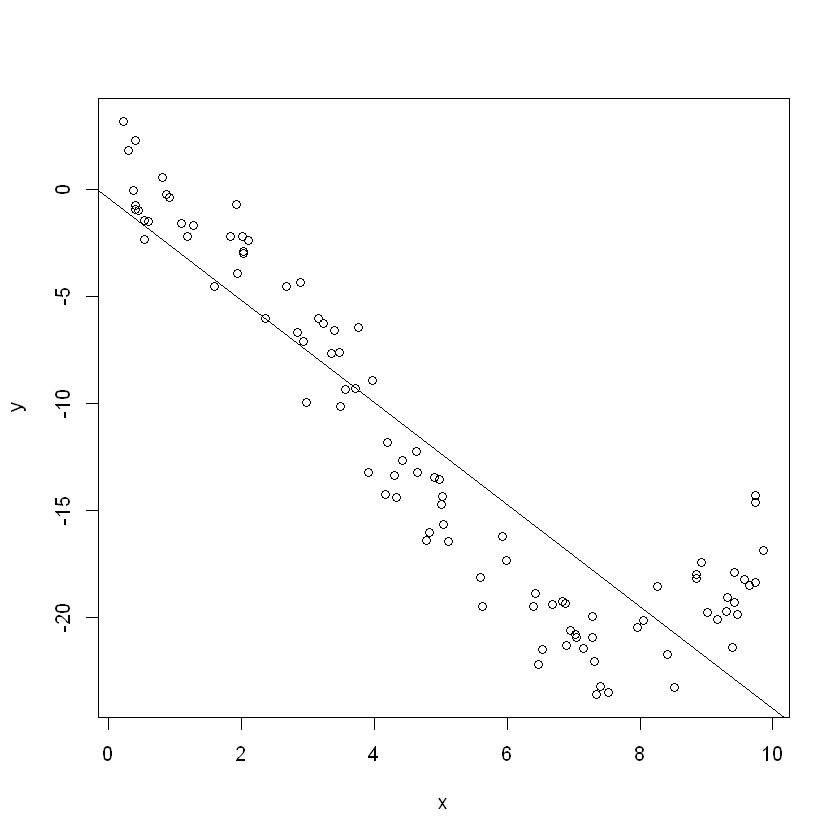

In [50]:
plot(x,y,type='p')
abline(f)

### Prediction step

In [55]:
yhat=predict(f,as.data.frame(x))

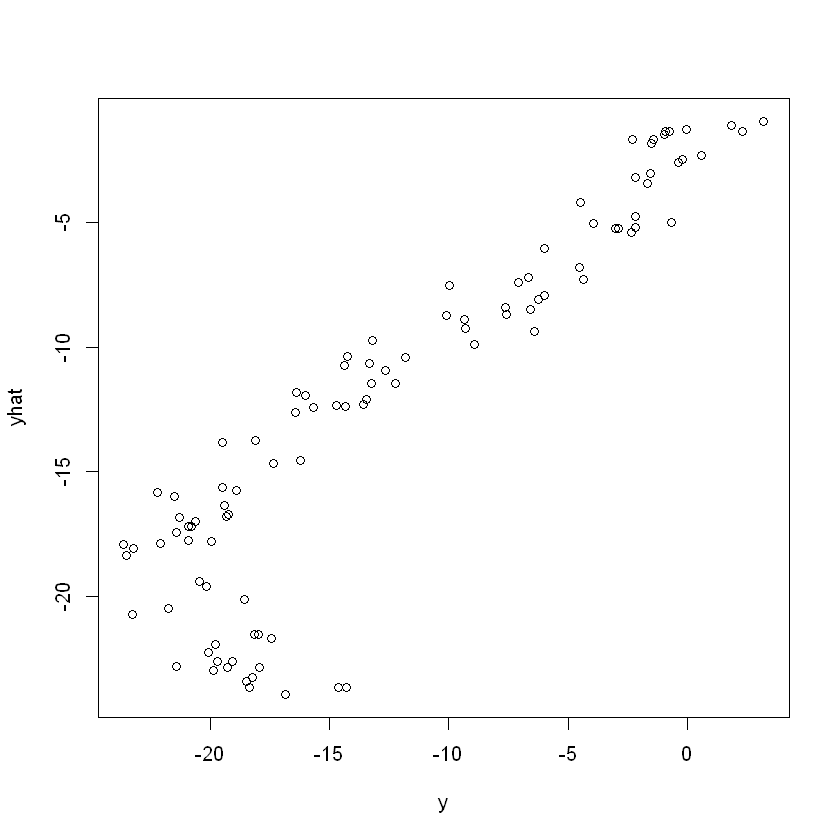

In [57]:
plot(y,yhat,type='p')

Fit is not perfect : it should be a y=x line

### Calculation of Learning Error Step

In [65]:
Errl= sum((y-yhat)^2)/length(yhat)
Errl

[1] 11.00903

**Not good BUT optimistic !

## The learning process - with "minimal setup"

### Learning step

In [76]:
train = sample(1:100,75)
f2=lm(y~x,subset = train)

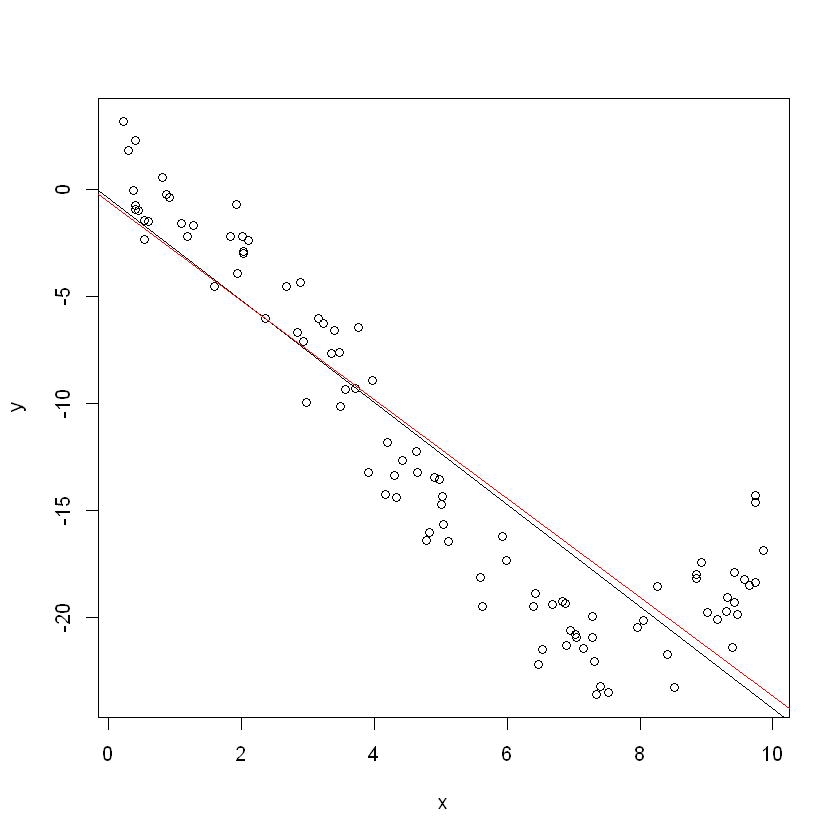

In [77]:
plot(x,y,type='p')
abline(f)
abline(f2,col='red')

### Evaluation Step

In [81]:
xval = data.frame(x = x[-train])
yhat2=predict(f2,newdata = xval)

### Error level Step

In [82]:
Errv = sum((y[-train]-yhat2)^2) / length(yhat2)
Errv

[1] 12.0283

**The error increases from 11 to 12

## Evaluation with a more complexe model - naive method

Let's try a complexe model (x^6)

[1] 2.194104

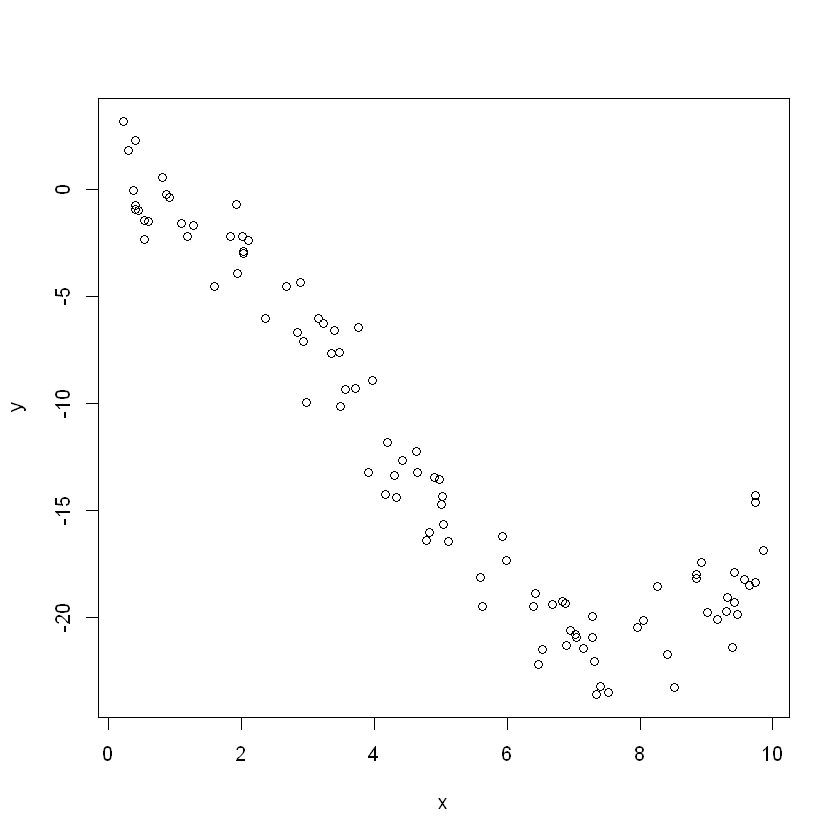

In [87]:
X=data.frame(x,x^2,x^3,x^4,x^5,x^6)
f3 =lm(y~., data = X)
plot(x,y,type='p')

yhat6=predict(f3,newdata=X)
Errl = sum((y-yhat6)^2)/length(yhat6)
Errl

Now the error is really lower on the learning set ... but still to optimistic

### with a the training set + evaluation

In [93]:
train = sample(1:100,75)
X=data.frame(x,x^2,x^3,x^4,x^5,x^6)
f4=lm(y~.,data = X, subset = train)
xval = X[-train,]
yhat2=predict(f4,newdata = xval)
Errl = sum((y[-train]-yhat2)^2)/length(yhat2)
Errl

[1] 3.55873

**This error is more realistic**

### searching the best model : increasing the number of variable x^i of the model

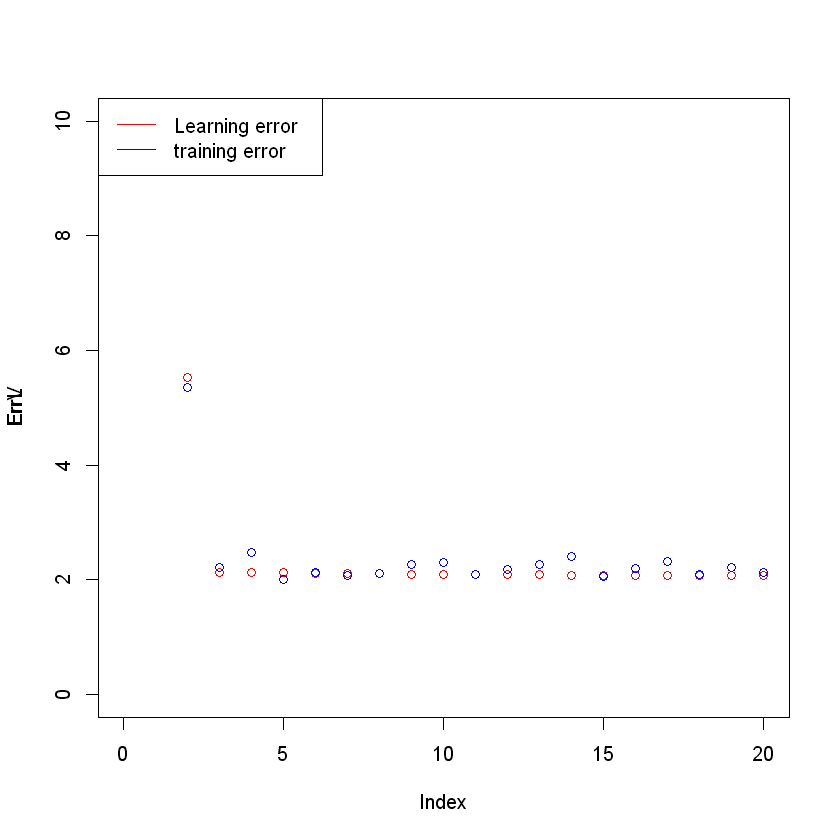

In [57]:
x = runif(1000,0,10)
eps = rnorm(1000,0,1.5)
y = 0.5 * x - 1.2 * x^2 + 0.1 * x^3 + eps

ErrL = ErrV = rep(NA,20)
X = data.frame(x)
for (c in 2:20){
    X=data.frame(X,x^c)
    f=lm(y~.,data = X)
    options(warn = -1)
    yhat = predict(f,newdata = X)
    ErrL[c] = sum((y-yhat)^2)/length(yhat)
                  
    train = sample(1:1000,750)
    f2=lm(y~.,data = X,subset = train)
    Xval = X[-train,]
    yhat = predict(f2,newdata = Xval)
    options(warn=0)
    ErrV[c] = sum((y[-train]-yhat)^2)/length(yhat)  
}
plot(ErrL,col='red',xlim=c(0,20),ylim=c(0,10))
par(new=TRUE)     
plot(ErrV,col='blue',xlim=c(0,20),ylim=c(0,10))
legend('topleft',legend = c("Learning error","training error"),col=c("red","blue"),lty=1)

In [18]:
which.min(ErrL)
which.min(ErrV)

[1] 20

[1] 6

### For Learning Error, the best model is with x^20 (in fact the model fit better and better when increasing the complexity
### For training Error, the best model is with x^6, which is more realistic

# Day 2

## Learning process - with "leave one out method"

In [26]:
X=data.frame(x,x^2,x^3,x^4,x^5,x^6)
Errv= c()
for (i in 1:nrow(X)) {
    # train model
    train = seq(1,nrow(X))[-i]
    f4=lm(y~.,data = X, subset = train)
    # predict
    xval = X[i,]
    yhat=predict(f4,newdata = xval)
    # caclulate error
    Errv[i] = sum((y[i]-yhat)^2)/length(yhat)
    }

[1] 2.313004

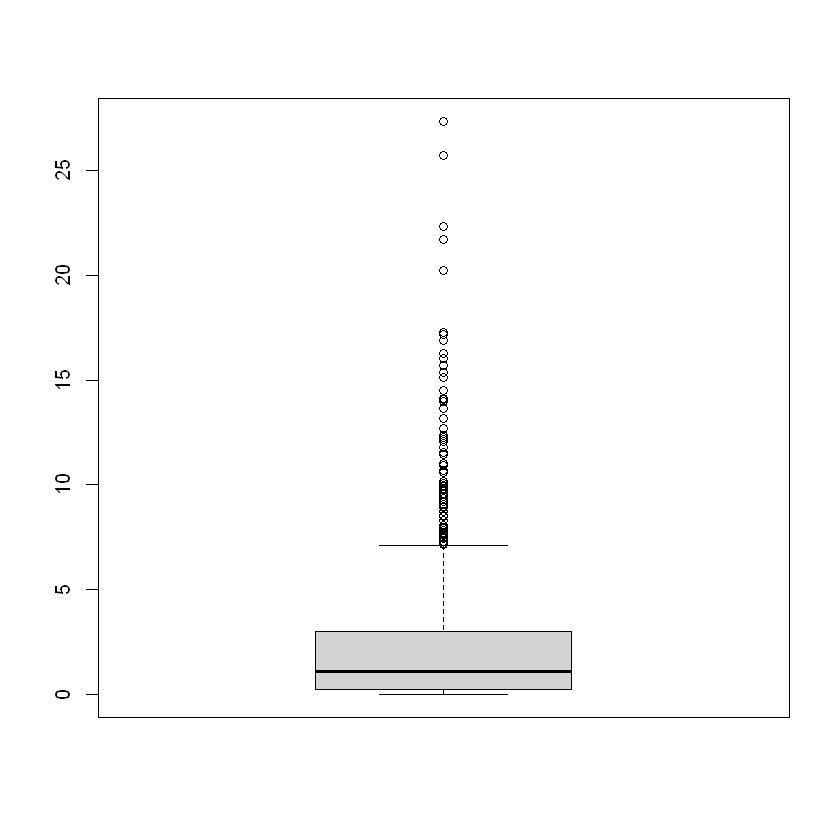

In [27]:
boxplot(Errv)
mean(Errv)

**The error found here : 2.31, can be relied on.

### Comparing errors between evaluation done on training, done by split method, done by leave one out method


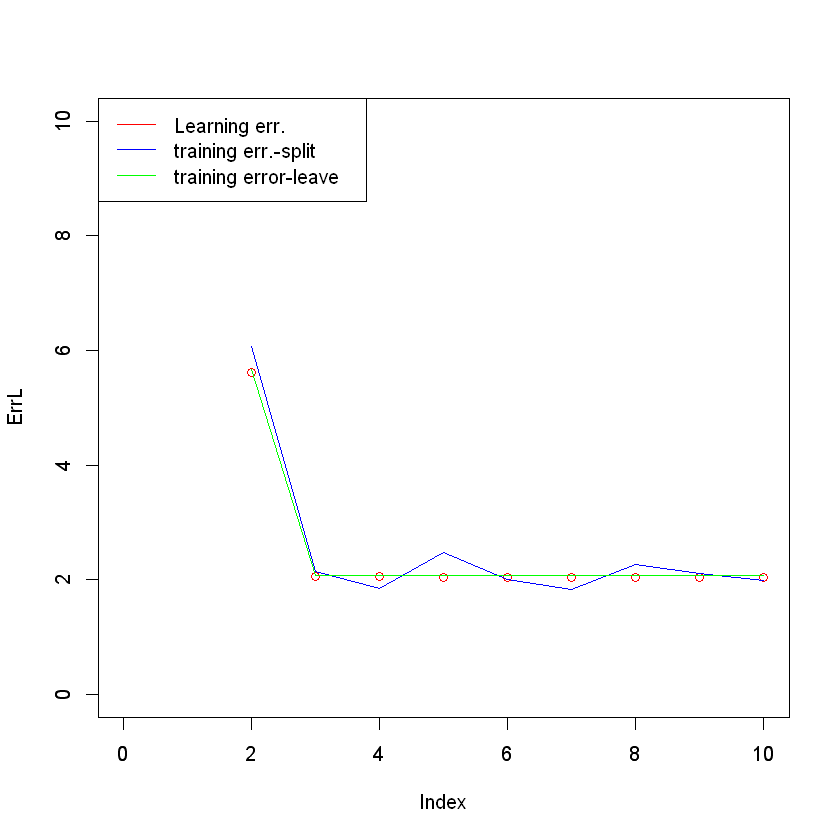

In [56]:
x = runif(1000,0,10)
eps = rnorm(1000,0,1.5)
y = 0.5 * x - 1.2 * x^2 + 0.1 * x^3 + eps

ErrL = ErrV = ErrCV = rep(NA,10)
X = data.frame(x)
for (c in 2:10){
    X=data.frame(X,x^c)
    f=lm(y~.,data = X)
    yhat = predict(f,newdata = X)
    ErrL[c] = sum((y-yhat)^2)/length(yhat)
                  
    train = sample(1:1000,750)
    f2=lm(y~.,data = X,subset = train)
    Xval = X[-train,]
    yhat = predict(f2,newdata = Xval)
    ErrV[c] = sum((y[-train]-yhat)^2)/length(yhat)  
    
    ErrCVall = c()
    for (i in 1:nrow(X)) {
        train = seq(1,nrow(X))[-i]
        f4=lm(y~.,data = X, subset = train)
        xval = X[i,]
        yhat=predict(f4,newdata = xval)
        ErrCVall[i] = sum((y[i]-yhat)^2)/length(yhat)
    }
    ErrCV[c]= mean(ErrCVall)
   
}
plot(ErrL,type = 'p',col='red',xlim=c(0,10),ylim=c(0,10))
par(new=TRUE)     
plot(ErrV,type='l',col='blue',xlim=c(0,10),ylim=c(0,10),xlab="",ylab="")
par(new=TRUE)     
plot(ErrCV,type='l',col='green',xlim=c(0,10),ylim=c(0,10),xlab="",ylab="")
legend('topleft',legend = c("Learning err.","training err.-split","training error-leave"),col=c("red","blue","green"),lty=1)                  


## Classification with KNN, Logistic regression and LDA
### KNN

using wine27 dataset from MBCbook package

In [153]:
install.packages('MBCbook')

Installing package into 'C:/Users/erick/R'
(as 'lib' is unspecified)

also installing the dependencies 'RcppEigen', 'mclust', 'Rmixmod', 'mvtnorm'




package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'mclust' successfully unpacked and MD5 sums checked
package 'Rmixmod' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'MBCbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\erick\AppData\Local\Temp\RtmpkJd4Jp\downloaded_packages


In [61]:
library(MBCbook)

Warning message:
"package 'MBCbook' was built under R version 4.0.2"
Loading required package: mclust

Warning message:
"package 'mclust' was built under R version 4.0.2"
Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: Rmixmod

Warning message:
"package 'Rmixmod' was built under R version 4.0.2"
Loading required package: Rcpp

Rmixmod v. 2.1.5 / URI: www.mixmod.org

Loading required package: MASS

Loading required package: mvtnorm


Attaching package: 'mvtnorm'


The following object is masked from 'package:mclust':

    dmvnorm




In [62]:
library(class)

In [63]:
data(wine27)

In [64]:
head(wine27)

,Alcohol,Sugar.free_extract,Fixed_acidity,Tartaric_acid,Malic_acid,Uronic_acids,pH,Ash,Alcalinity_of_ash,Potassium,...,Hue,OD280.OD315_of_diluted_wines,OD280.OD315_of_flavanoids,Glycerol,X2.3.butanediol,Total_nitrogen,Proline,Methanol,Type,Year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,14.23,24.82,73.1,1.21,1.71,0.72,3.38,2.43,15.6,950,...,1.04,3.92,4.77,9.29,757,153,1065,113,Barolo,1971
2,13.20,26.30,72.8,1.84,1.78,0.71,3.30,2.14,11.2,765,...,1.05,3.40,3.80,8.93,881,194,1050,94,Barolo,1971
3,13.16,26.30,68.5,1.94,2.36,0.84,3.48,2.67,18.6,936,...,1.03,3.17,3.46,11.74,900,206,1185,125,Barolo,1971
4,14.37,25.85,74.9,1.59,1.95,0.72,3.43,2.50,16.8,985,...,0.86,3.45,3.54,10.13,1119,292,1480,80,Barolo,1971
5,13.24,26.05,83.5,1.30,2.59,1.10,3.42,2.87,21.0,1088,...,1.04,2.93,3.22,10.27,799,215,735,73,Barolo,1971
6,14.20,28.40,79.9,2.14,1.76,0.96,3.39,2.45,15.2,868,...,1.05,2.85,3.16,10.85,865,364,1450,68,Barolo,1971


**we will use the column Type in order to realize the classification

### Training and  prediction with split method
**KNN train and train at the same time**
**Here we have choosen k=3 arbitrary

In [68]:
N = nrow(wine27)
# remove colums Type and Year
X=wine27[,1:27]
Y=wine27$Type
# train and predict
train=sample(1:N,150)
out = knn(X[train,],X[-train,],Y[train],3)
out

[1] Barolo     Barolo     Barolo     Barolo     Barbera    Barbera   
 [7] Grignolino Grignolino Grignolino Grignolino Grignolino Grignolino
[13] Barbera    Grignolino Barbera    Barbera    Grignolino Barbera   
[19] Barbera    Grignolino Barbera    Barbera    Grignolino Barbera   
[25] Barbera    Barbera    Barbera    Barbera   
Levels: Barbera Barolo Grignolino

### Calculation of the validation error

In [69]:
res = (as.numeric(out)-as.numeric(Y[-train]))
err = length(res[res != 0])/length(out)
err

[1] 0.25

In [71]:
sum(out != Y[-train])/length(out)

[1] 0.25

### Training and  prediction with "leave one out" - searching for best k

[1] 9

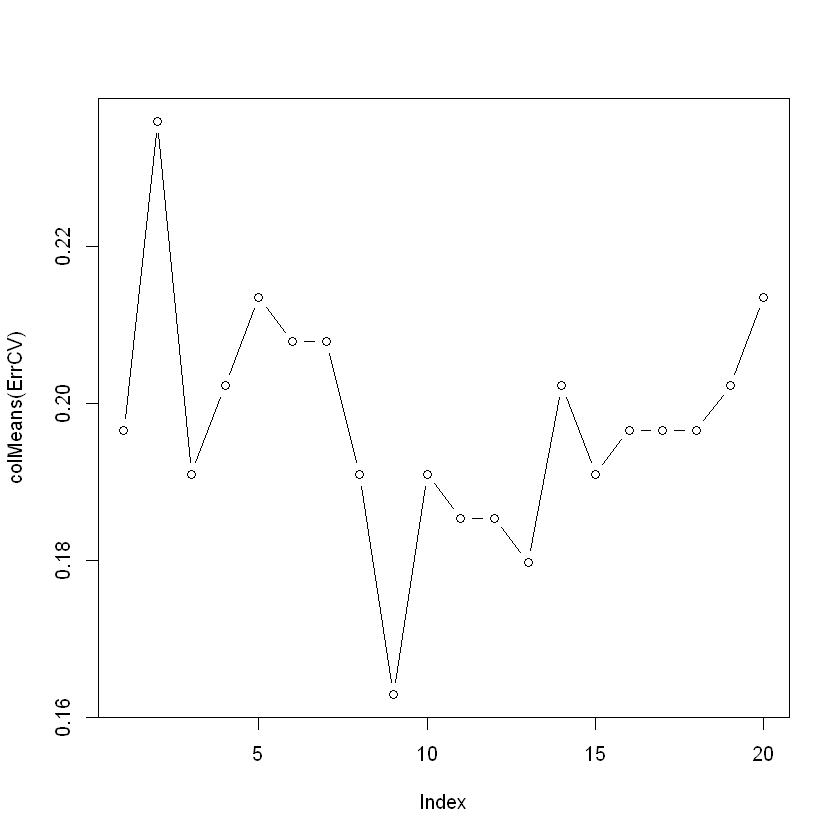

In [78]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
ErrCV = matrix(NA,N,20)
for (k in 1:20) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],k)
        ErrCV[i,k] = sum(out != Y[-train])/length(out)
    }
}
plot(colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

** here the smallest error is for k=9

In [79]:
min(colMeans(ErrCV))

[1] 0.1629213

### 16% of error is quit high
**Best solution seems to be 9**

**But there are random in the search of the neighboor done by R, so if the algo is run several times, the result changes**

### LDA algorythm
Learning, prediction and calculation erro value - with split method

In [82]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
train=sample(1:N,150)

f = lda(X[train,],Y[train])

#prediction step
yhat = predict(f,X[-train,])
sum(yhat$class != Y[-train])/length(yhat$class)


[1] 0

* yhat$class : gives the result

* yhat$posterior : gives the probability for each class

** Here LDA perfectly classify : err =0**

### LDA with 'leave one out method

In [85]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
ErrCV = rep(NA,N)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }
mean(ErrCV)

[1] 0.01123596

**1.1% really better then KNN**

### Logistic Regression
We will use banknote dataset with binary classification

In [86]:
data(banknote)

In [88]:
head(banknote)

,Status,Length,Left,Right,Bottom,Top,Diagonal
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8
6,genuine,215.7,130.8,130.5,9.0,10.1,141.4


**Training, classification and calculation of the error**

with split method

In [89]:
N = nrow(banknote)
X=banknote[,-1]
Y=banknote$Status
train=sample(1:nrow(X),150)

f = glm(Status~.,data=banknote, subset = train,family = 'binomial')

out = predict(f,newdata = X[-train,])
yhat = (as.numeric(out) > 0) +  1
sum(yhat != as.numeric(Y[-train])) / length(yhat)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] 0.04

The error is 4%

### Comparing Knn, LDA and Logistic Regression with leave one out method

In [92]:
N = nrow(banknote)
X=banknote[,-1]
Y=banknote$Status

ErrCV.kNN = rep(NA,N)
ErrCV.LDA = rep(NA,N)
ErrCV.LReg = rep(NA,N)
options(warn = -1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = glm(Status~.,data=banknote, subset = train,family = 'binomial')

        out = predict(f,newdata = X[-train,])
        yhat = (as.numeric(out) > 0) +  1
        ErrCV.LReg[i] = sum(yhat != as.numeric(Y[-train])) / length(yhat)       
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],1)
        ErrCV.kNN[i] = sum(out != Y[-train])/length(out)
    }
options(warn=0)
mean(ErrCV.LDA)
mean(ErrCV.LReg)
mean(ErrCV.kNN)
Err = cbind(ErrCV.LDA,ErrCV.LReg,ErrCV.kNN)
colMeans(Err)


[1] 0.005

[1] 0.025

[1] 0.005

ErrCV.LDA ErrCV.LReg  ErrCV.kNN 
     0.005      0.025      0.005

### Comparaison of the 3 methods
KNN and LDA are best

Logistic Regression is 3rd

We can even calculate standard deviation (see below) and even confidence interval (to be done) with the errors calculated with leave one out methos

In [283]:
apply(Err,2,sd)

ErrCV.LDA ErrCV.LReg  ErrCV.kNN 
0.07071068 0.11623815 0.07071068

### Confirmation that the k=1 is the best parameter for Knn on banknote dataser

[1] 1

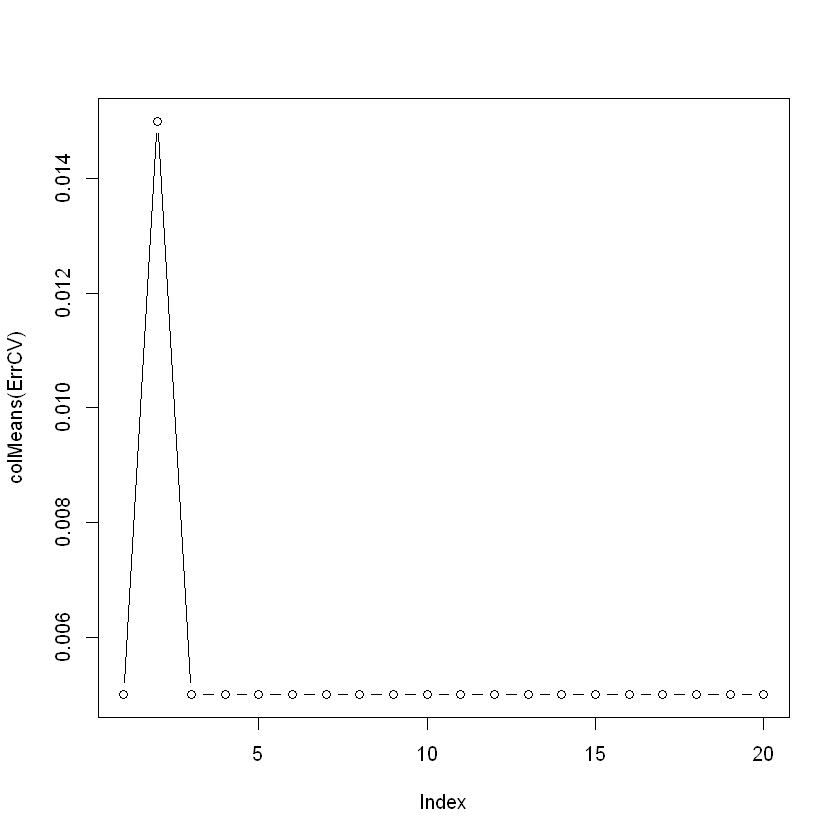

In [93]:
N = nrow(banknote)
X=banknote[,-1]
Y=banknote$Status
ErrCV = matrix(NA,N,20)
for (k in 1:20) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],k)
        ErrCV[i,k] = sum(out != Y[-train])/length(out)
    }
}
plot(colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

### Comparison of Knn, Lda and Logistic Regression on swiss dataset

In [94]:
data(swiss)

The Classification is done on $Catholic variable.

The numerical variable is trnasformed into a boolean

In [95]:
X = swiss[,-5]
Y= swiss$Catholic >= 50

### find best k for Knn - using leave one out method


[1] 3

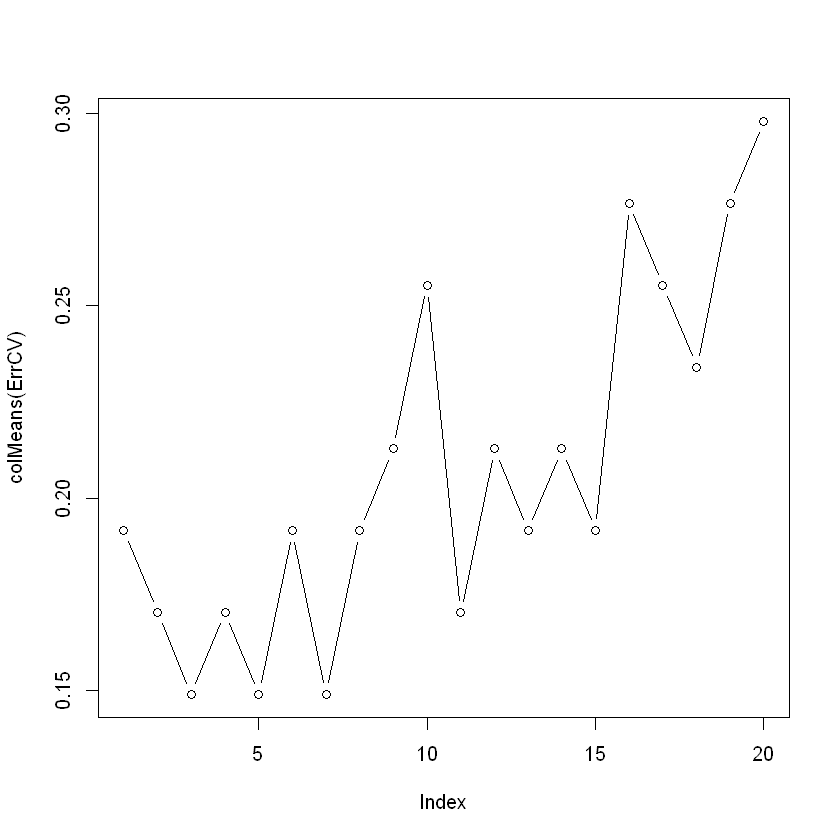

In [96]:
N = nrow(swiss)
X = swiss[,-5]
Y= swiss$Catholic >= 50
ErrCV = matrix(NA,N,20)
for (k in 1:20) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],k)
        ErrCV[i,k] = sum(out != Y[-train])/length(out)
    }
}
plot(colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

K = 3

In [99]:
N = nrow(swiss)
X = swiss[,-5]
Y= swiss$Catholic >= 50
ErrCV.kNN = rep(NA,N)
ErrCV.LDA = rep(NA,N)
ErrCV.LReg = rep(NA,N)
options(warn=-1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = glm((Catholic>50)~., data = swiss, subset = train,family = 'binomial')

        out = predict(f,newdata = X[-train,])
        yhat = (out > 0)
        ErrCV.LReg[i] = sum(yhat != (as.numeric(Y[-train]))) / length(yhat)     
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],3)
        ErrCV.kNN[i] = sum(out != Y[-train])/length(out)
    }
options(warn=0)   
#mean(ErrCV.LDA)
#mean(ErrCV.LReg)
#mean(ErrCV.kNN)
Err = cbind(ErrCV.LDA,ErrCV.LReg,ErrCV.kNN)
colMeans(Err)

ErrCV.LDA ErrCV.LReg  ErrCV.kNN 
 0.1489362  0.1276596  0.1489362

** For swiss dataset, Logistic regression is best method.**